1. Используя готовые методы из библиотеки sklearn, применить линейные алгоритмы для классификации исходных данных.
2. Оценить качество построенных алгоритмов.

In [1]:
import numpy as np #массивы
import matplotlib.pyplot as plt #рисует графики
from matplotlib.colors import ListedColormap#карта цветов
from sklearn import datasets #демонстрационные выборки
import sklearn.linear_model as LM #классификаторы
from sklearn.model_selection import LeaveOneOut # дробит выборку на все возможные варианты без одного тестового элемента
Loo=LeaveOneOut()
#['PassiveAggressiveClassifier','SGDClassifier']
list_clss=['hinge','log','modified_huber','squared_hinge','perceptron']
from sklearn.model_selection import LeaveOneOut # дробит выборку на все возможные варианты без одного тестового элемента
# from sklearn.metrics import accuracy_score # вычисляет точность классификации
# загрузка данных "Ирисы фишера"
iris = datasets.load_iris()
y=iris.target # номера классов
X=iris.data[:,[0,3]] # 2 признака
h = .01 # шаг сетки
# создание цветовых карт
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [2]:
#Для графического представления, найдем максимальные и минимальные значения признаков и увеличим(уменьшим) их на 1
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
# получим сетку
xx, yy = np.meshgrid(np.arange(x_min - 1, x_max + 1, h), np.arange(y_min - 1, y_max + 1, h))
# метод ravel "распутывает" матрицу в массив приставляя к первой строке вторую потом третью и т.д.
# метод c_ принимает два массива и превращает их в матрицу, где эти массивы столбцы

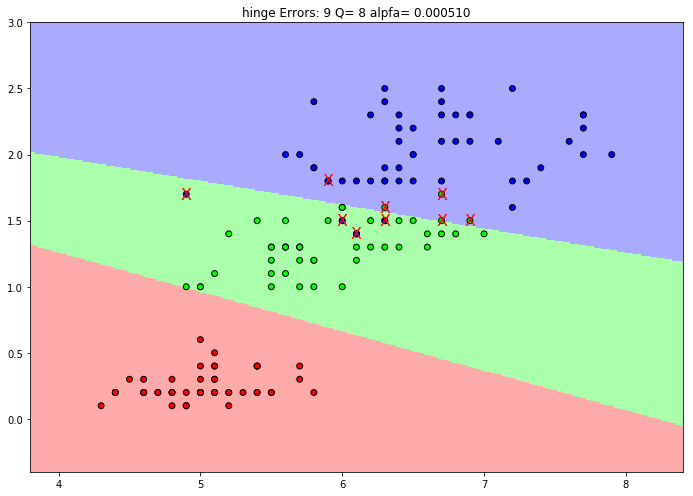

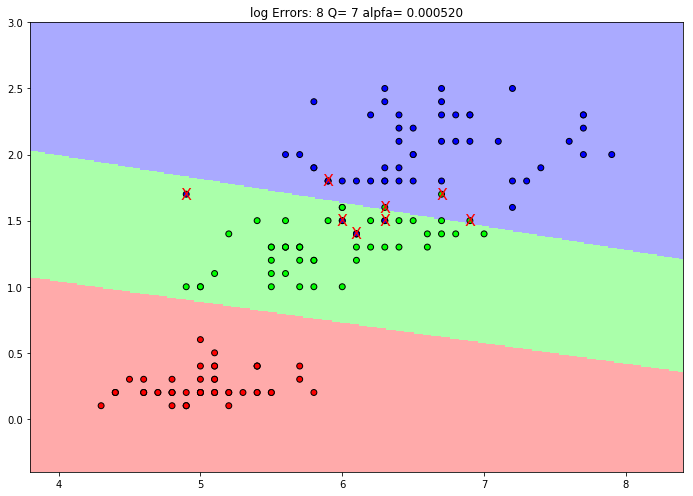

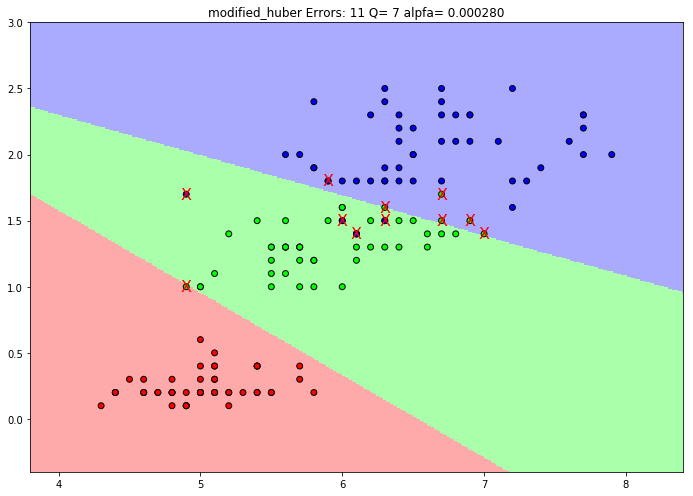

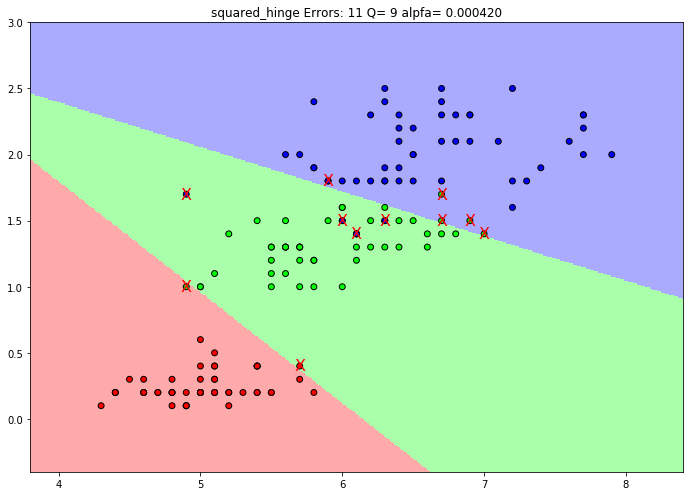

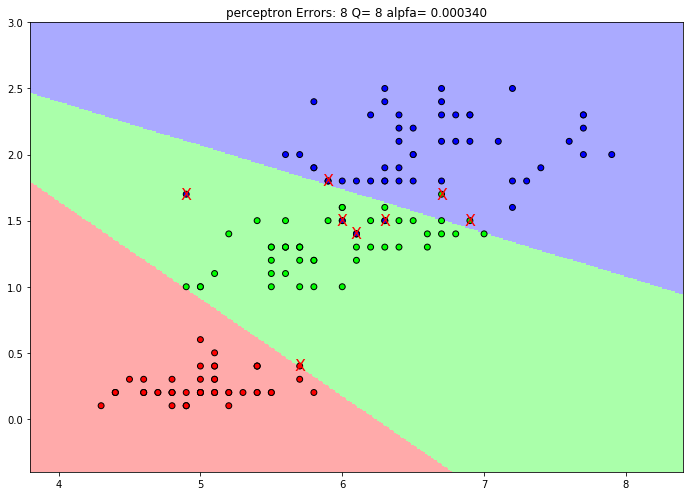

In [3]:
for i in range(len(list_clss)):
    Q=[] #список ошибок
    for j in range(100):
        cls=LM.SGDClassifier(alpha=0.00001+i*0.00001, max_iter=10000,loss=list_clss[i],n_jobs=3)
        qq=0 #число ошибок в текущем скользящем контроле
        for train_index, test_index in Loo.split(X): #разбиваем индексы на тестовые и обучающие
            cls.fit(X[train_index], y[train_index]) #подгоняем данные
            qq+= (y[test_index]!=cls.predict(X[test_index])).sum() #увеличиваем число ошибок если тест не равен предсказанию
        Q.append(qq) #Добавляем частоту ошибок в список частот ошибок
    minQ=min(Q) # ищем минимальное количство ошибок
    alpha=0.00001*Q.index(minQ)+0.00001 # ищем альфа при минимуме ошибок    
    cls=LM.SGDClassifier(alpha=alpha, max_iter=10000,loss=list_clss[i],n_jobs=3)
    y_pred = cls.fit(X, y).predict(X)
    Z = cls.predict(np.c_[xx.ravel(), yy.ravel()]) # классифицыруем сетку
    # аргумент shape выдает форму матрицы (число строк, число столбцов)
    # метод reshape принимает форму и переделывает в соответствии с ней
    Z = Z.reshape(xx.shape)
    fig, axs = plt.subplots(nrows=1, ncols=1, sharex=False) #создаем фигуру
    fig.set_size_inches(29.7 / 2.54 , 21. / 2.54) #установить размер изображения формат А4, альбомная ориентация
    axs.pcolormesh(xx, yy, Z, cmap=cmap_light) #заливаем фон разными цветами, на основе сетки, классификации и цветовой карты
    # раставляем элементы выборки кружками радиуса 35 с черным ободком
    axs.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=35) # наносим известные элементы на график
    filtr= y!=cls.predict(X) #получим логический фильтр неправильно классифицированных элементов
    #print(filtr)
    XErr = X[filtr] #массив неправильноклассифицированных элементов
    yErr = y[filtr] #соответствующие им правильные ответы
    # зачеркиваем неправильтно классифицированные элементы красными "иксами"
    for Er in XErr:
        axs.text(Er[0], Er[1], "X", color="r", fontsize=16, horizontalalignment='center', verticalalignment='center')
    # установка ограничений на оси, немного обрежем по краям график, чтобы увеличиласть область с известными ответами
    axs.set_xlim(x_min-0.5, x_max+0.5)
    axs.set_ylim(y_min-0.5, y_max+0.5)
    # добавление заголовка
    axs.set_title(list_clss[i]+" Errors: %i Q= %i alpfa= %f" % (len(XErr),minQ,alpha))
    plt.show()

Как видим градиентный спуск с параметром "log" дал 8 ошибок из 150 при классификации и 7 при кросвалидации LOO,
что является наилучшим результатом.